In [1]:
import keras
from keras.datasets import mnist
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
num_classes = 10

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)  #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)

X1_train  = x_train.T
X1_test  = x_test.T
Y1_test  = y_test[:,:1].T
print(X1_train.shape)
print(Y1_test.shape)


60000 train samples
10000 test samples
(784, 60000)
(1, 10000)


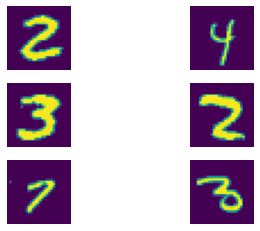

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(1, 60000)


In [3]:
r = 25
n = 6
for i in range(n):
    img = np.reshape(x_train[i+r,:],(28,28))
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()
print(y_train[r:r+n,:])

Y_train = y_train[:,:1]
Y1_train = Y_train.T
print(Y1_train.shape)

In [4]:
# sigmoid
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [5]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
  #  assert(w.shape == (dim, 1))  #assert use for debug(crosscheck that what we are doing is correct or not)
   # assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [6]:
# propagate

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)                                   # compute activation
    cost = (-1/m)*np.sum((Y*np.log(A))+((1-Y)*np.log(1-A)))        # compute cost(loss)
   
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum((A-Y))
   

 #   assert(dw.shape == w.shape)
  #  assert(db.dtype == float)
   # cost = np.squeeze(cost)
   # assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [15]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)  
        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
         
        # update
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
       
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        #if print_cost and i % 100 == 0:
         #   print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [16]:
# predict

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
 
    for i in range(A.shape[1]):
        Y_prediction = 1.*(A>0.5)
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [19]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = False):
    
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [20]:
d = model(X1_train, Y1_train, X1_test, Y1_test, learning_rate = 0.01, num_iterations=500,print_cost=True)

train accuracy: 97.57666666666667 %
test accuracy: 97.66 %


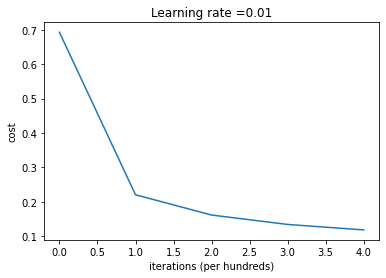

In [21]:
#learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [13]:
W = d['w'].T
W

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.81182558e-06, -2.07583434e-05, -1.13752467e-05,
        -4.73968631e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -6.60372459e-07,
        -2.41908541e-06, -3.36804115e-05, -8.41940275e-05,
        -1.67108424e-04, -2.66771953e-04, -4.63910752e-04,
        -4.39766435e-04, -3.10204768e-04, -4.28151330e-04,
        -7.58506279e-04, -6.28884729e-04, -6.55961630e-04,
        -5.26917081e-04, -3.45793177e-04, -2.55665637e-04,
        -1.91673043e-04, -6.71768726e-05, -2.51456939e-0

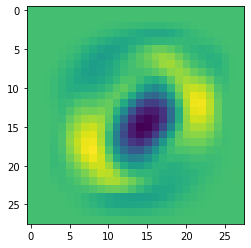

In [14]:
img = np.reshape(W,(28,28))
plt.imshow(img)